# Data Wrangling (Brain Tumor Classification)

## Step 1: Importing Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os, sys
import cv2
import PIL
import os.path
from PIL import Image
import scipy.ndimage as ndi
from skimage import color

## Step 2: Inspecting and Visualizing the Dataset

In [42]:
# Data directories
data_path = "../Brain_Tumor_Dataset/"
os.listdir(data_path)

['Testing', 'Training']

In [40]:
# Training subfolders
os.listdir(data_path+'Training')

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [41]:
# Testing subfolders
os.listdir(data_path+'Testing')

['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

### I. Checking the file format of the images in training and testing sets

In [22]:
# Training Directories
glioma_path_tr = "../Brain_Tumor_Dataset/Training/Glioma/"
notumor_path_tr = "../Brain_Tumor_Dataset/Training/NoTumor/"
pituitary_path_tr = "../Brain_Tumor_Dataset/Training/Pituitary/"
meningioma_path_tr = "../Brain_Tumor_Dataset/Training/Meningioma/"

training_paths = [glioma_path_tr, pituitary_path_tr, meningioma_path_tr, notumor_path_tr]


In [23]:
# Test Directories
glioma_path_te = "../Brain_Tumor_Dataset/Testing/Glioma/"
notumor_path_te = "../Brain_Tumor_Dataset/Testing/NoTumor/"
pituitary_path_te = "../Brain_Tumor_Dataset/Testing/Pituitary/"
meningioma_path_te = "../Brain_Tumor_Dataset/Testing/Meningioma/"

test_paths = [glioma_path_te, pituitary_path_te, meningioma_path_te, notumor_path_te]

In [24]:
# Checking Image File Format other than [.jpg] for Training Set
count = 0
for path in training_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            count += 1
            # print('Other Format Found')
        else:
            continue
print(f'Count: {count}')

Count: 0


In [25]:
# Checking Image File Format other than [.jpg] for Testing Set
count = 0
for path in test_paths:
    list_images = os.listdir(path)
    for i in list_images:
        if i.split('.')[-1] != 'jpg':
            count += 1
            #print('Other Format Found')
        else:
            continue
print(f'Count: {count}')

Count: 0


### II. Visualizing different tumor class and their respective shapes 

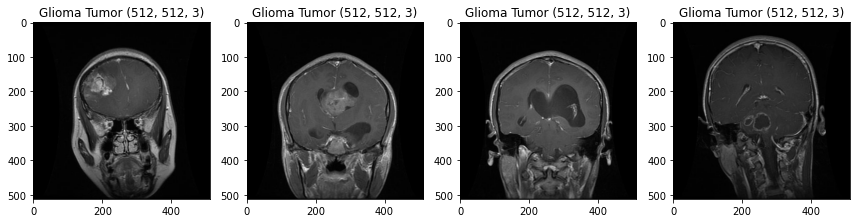

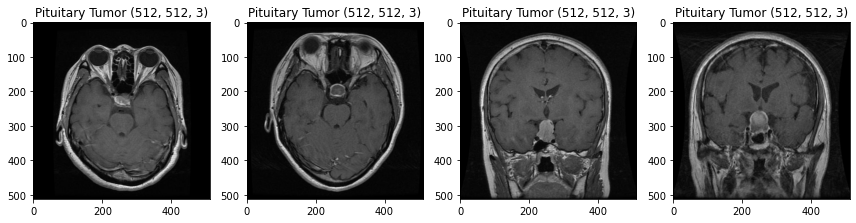

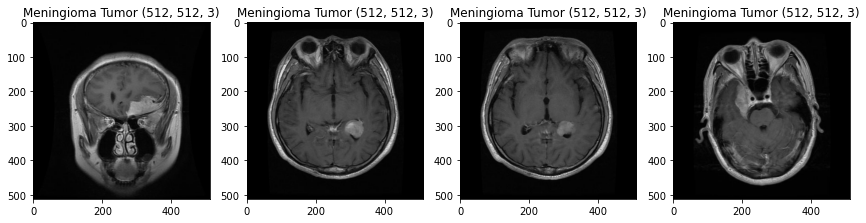

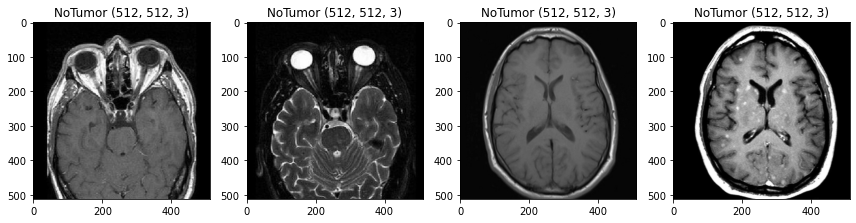

In [26]:
# Visualizing all different tumor types in training dataset and 
# The respective size of the images

for path in training_paths:
    list_images = os.listdir(path)
    fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,6))
    for i in range(4):
        # plt.figure()
        array = plt.imread(os.path.join(path, list_images[i]))
        ax[i].imshow(array)
        if path.split('/')[-2] == 'NoTumor':
            ax[i].set_title(path.split('/')[-2]+f' {array.shape}')
        else:
            ax[i].set_title(path.split('/')[-2]+' Tumor'+f' {array.shape}')
    fig.tight_layout()

The figures above shows that all the images are RGB and most of them are of size (512,512). Some of the images in NoTumor Class contains different sizes. In that case, I need to resize all of the images to make a unique size.

### III. Inspecting the RGB images

In [35]:
# Inspecting the size, shape, and data-type of a single image
image_array = plt.imread("../Brain_Tumor_Dataset/Training/Glioma/Tr-gl_0021.jpg")
print(f"Size :{image_array.size}, Shape: {image_array.shape}', Data Type: {image_array.dtype}")

Size :786432, Shape: (512, 512, 3)', Data Type: uint8


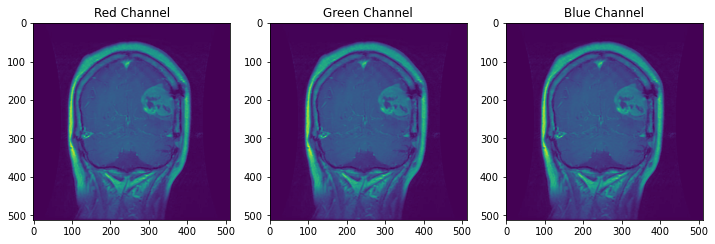

In [36]:
# Inspecting the different channels of the RGB image

red_channel = image_array[:,:,0]
green_channel = image_array[:,:,1]
blue_channel = image_array[:,:,2]
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
ax[0].imshow(red_channel)
ax[0].set_title('Red Channel')
ax[1].imshow(green_channel)
ax[1].set_title('Green Channel')
ax[2].imshow(blue_channel)
ax[2].set_title('Blue Channel')
plt.show()
fig.tight_layout()

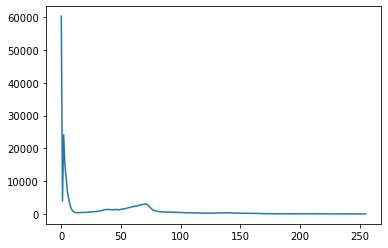

In [32]:
# Inspecting the green channel of the RGB Image using scipy.ndimage
hist = ndi.histogram(green_channel, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

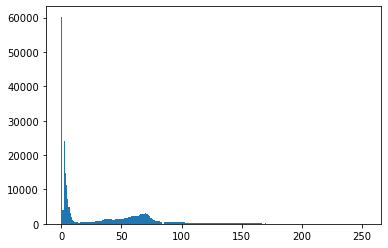

In [33]:
# Visualizing the histogram red channel of the RGB image using matplotlib.pyplot
plt.hist(red_channel.ravel(), bins=256)
plt.show()

Shape: (512, 512)


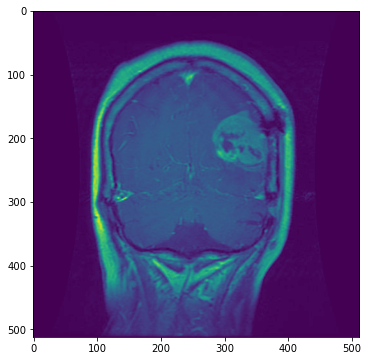

In [11]:
# The gray scale of the RGB images
plt.figure(figsize=(6,6))
gray_image = color.rgb2gray(array)
print("Shape:", gray_image.shape)
plt.imshow(gray_image)

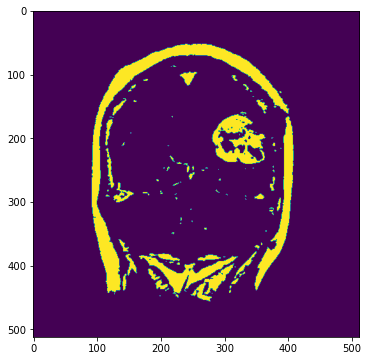

In [12]:
# Trying to manually segment and visualize the tumor area inside the head
plt.figure(figsize=(6,6))
# plt.imshow(gray>0.37)
# plt.imshow(array)
plt.imshow(array[:,:,0]>90)

## Step 3: Resizing the images in each training and testing subfolders

### I. Checking the shape of the images in each subfolders before cropping and resizing

In [13]:
# Checking whether there is any Gray Scale images in testing datasets

count = 0
for path in training_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        try:
            channel = img_array.shape[2]
            if channel != 3:
                count += 1
        except:
            pass
print(f"Count: {count}")   

Count: 0


In [14]:
# Checking whether there is any Gray Scale images in testing datasets

count = 0
for path in test_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        try:
            channel = img_array.shape[2]
            if channel != 3:
                count += 1
        except:
            pass
print(f"Count: {count}")           

Count: 0


In [15]:
# Checking the image shape of each training subfolders before cropping and resizing

base_HW = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0
for path in training_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        #height = img_array.shape[0]
        #width = img_array.shape[1]
        if (height == base_HW) and (width == base_HW) and (channel == 3):
            continue
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            # print(f"Min HXW {os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            # print(f"Max HXW {os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
print(f"Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")

Count: 355 
Min Height: 198, Min Width: 150       
Max Height: 1080, Max Width 1920


By inspecting the shape of the images in different training sub folders its visible that there is no gray scale images other than RGB.  Also, the height and width of images in some folder contains different shape other than (512, 512). The number of images that contain different shape is 355. So, We need to resize the images in respective subfolders.

In [16]:
# Checking the image shape of each testing subfolders before cropping and resizing

base_hw = 512
min_height = 512
min_width = 512
max_height = 512
max_width = 512
count = 0
for path in test_paths:
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        height, width, channel = img_array.shape
        #height = img_array.shape[0]
        #width = img_array.shape[1]
        if (height == base_hw) and (width == base_hw) and (channel == 3):
            continue
        elif ((height < base_HW) or (width < base_HW)) and ((height < min_height) or (width < min_width)):
            # print(f"Min HXW {os.path.join(path, img_name)}")
            min_height = height
            min_width = width
            count += 1
        elif ((height > base_HW) or (width > base_HW)) and ((height > max_height) or (width > max_width)):
            # print(f"Max HXW {os.path.join(path, img_name)}")
            max_height = height
            max_width = width
            count += 1
print(f"Count: {count} \nMin Height: {min_height}, Min Width: {min_width} \
      \nMax Height: {max_height}, Max Width {max_width}")

Count: 215 
Min Height: 168, Min Width: 300       
Max Height: 1019, Max Width 1149


By inspecting the shape of the images in different testing sub folders its visible that there is no gray scale images other than RGB. Also, the height and width of images in some folder contains different shape other than (512, 512). The number of images that contain different shape is 215. So, We need to resize the images in respective subfolders.

### II. Cropping and resizing required images

In [17]:
# Resizing an saving the training images in same folder with same file name

for path in training_paths:
    for img_name in os.listdir(path):
        if (path != training_paths[3]):
            f_img = path+img_name
            img = Image.open(f_img)
            try:
                img = img.resize((512,512), PIL.Image.ANTIALIAS)
                img.save(f_img, quality=95)
            except ValueError:
                print("There is something wrong")

In [18]:
# Resizing an saving the test images in same folder with same file name

for path in test_paths:
    for img_name in os.listdir(path):
        f_img = path+img_name
        img = Image.open(f_img)
        try:
            img = img.resize((512,512), PIL.Image.ANTIALIAS)
            img.save(f_img, quality=95)
        except ValueError:
            print("There is something wrong")

In [19]:
# NoTumor Folder in Training subset

path = training_paths[3]
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            im = im.convert('RGB')
            f_img = path+item
            imResize = im.resize((512,512), Image.ANTIALIAS)
            imResize.save(f_img, quality=95)

resize()

## Step 4: Image Denoising

In [ ]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

In [ ]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

In [ ]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

In [ ]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

In [ ]:
# Example resizing

notumor_path = "../Brain_Tumor_Dataset/Testing/NoTumor/"

for file in os.listdir(notumor_path):
    f_img = notumor_path+file
    img = Image.open(f_img)
    try:
        img = img.resize((512,512), PIL.Image.ANTIALIAS)
        img.save(f_img)
    except:
        pass

In [ ]:
# Cropping an Image
"""
import PIL
from PIL import Image 
 
img = Image.open(glioma_path+'Tr-gl_0021.jpg') 

left = 77
top = 45
right = 420
bottom = 500

img_res = img.crop((left, top, right, bottom)) 

new_img = img_res.resize((512,512), PIL.Image.ANTIALIAS)
new_img.show() 

"""

In [ ]:
deff

### Examples

In [ ]:
# In case you want to keep the same aspect ratio of the image you can use this script.
from PIL import Image
import os, sys

path = "/path/images/"
dirs = os.listdir( path )
final_size = 244;

def resize_aspect_fit():
    for item in dirs:
         if item == '.DS_Store':
             continue
         if os.path.isfile(path+item):
             im = Image.open(path+item)
             f, e = os.path.splitext(path+item)
             size = im.size
             ratio = float(final_size) / max(size)
             new_image_size = tuple([int(x*ratio) for x in size])
             im = im.resize(new_image_size, Image.ANTIALIAS)
             new_im = Image.new("RGB", (final_size, final_size))
             new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
             new_im.save(f + 'resized.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [ ]:
from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
ORI_PATH = '..\DATA\ORI-DIR'
NEW_SIZE = 224
PATH = '..\DATA\NEW-RESIZED-DIR' #the path where to save resized images

# create new folder
if not os.path.exists(PATH):
    os.makedirs(PATH)

# loop over existing images and resize
# change path to your path
for filename in glob.glob(ORI_PATH+'**/*.jpg'): #path of raw images with is subdirectory
    img = Image.open(filename).resize((NEW_SIZE,NEW_SIZE))
    
    # get the original location and find its subdir
    loc = os.path.split(filename)[0]
    subdir = loc.split('\\')[1]
    
    # assembly with its full new directory
    fullnew_subdir = PATH+"/"+subdir
    name = os.path.split(filename)[1]
    
    # check if the subdir is already created or not
    if not os.path.exists(fullnew_subdir):
        os.makedirs(fullnew_subdir)